In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lmfit import Model

from scipy.stats import linregress
from contact_resistance_v2 import idea

sns.set_theme(style = 'ticks', palette = 'Set1') #'Set1', 'Pastel1', 'Dark2'

Fit and plot Spacing vs Resistance per sample

,Sheet resistance ($\Omega$/sq),Contact resistance ($\Omega$/sq),Conductivity (S/cm),Sample
0,3.979361e+09,0.5598,0.000014,0G_31


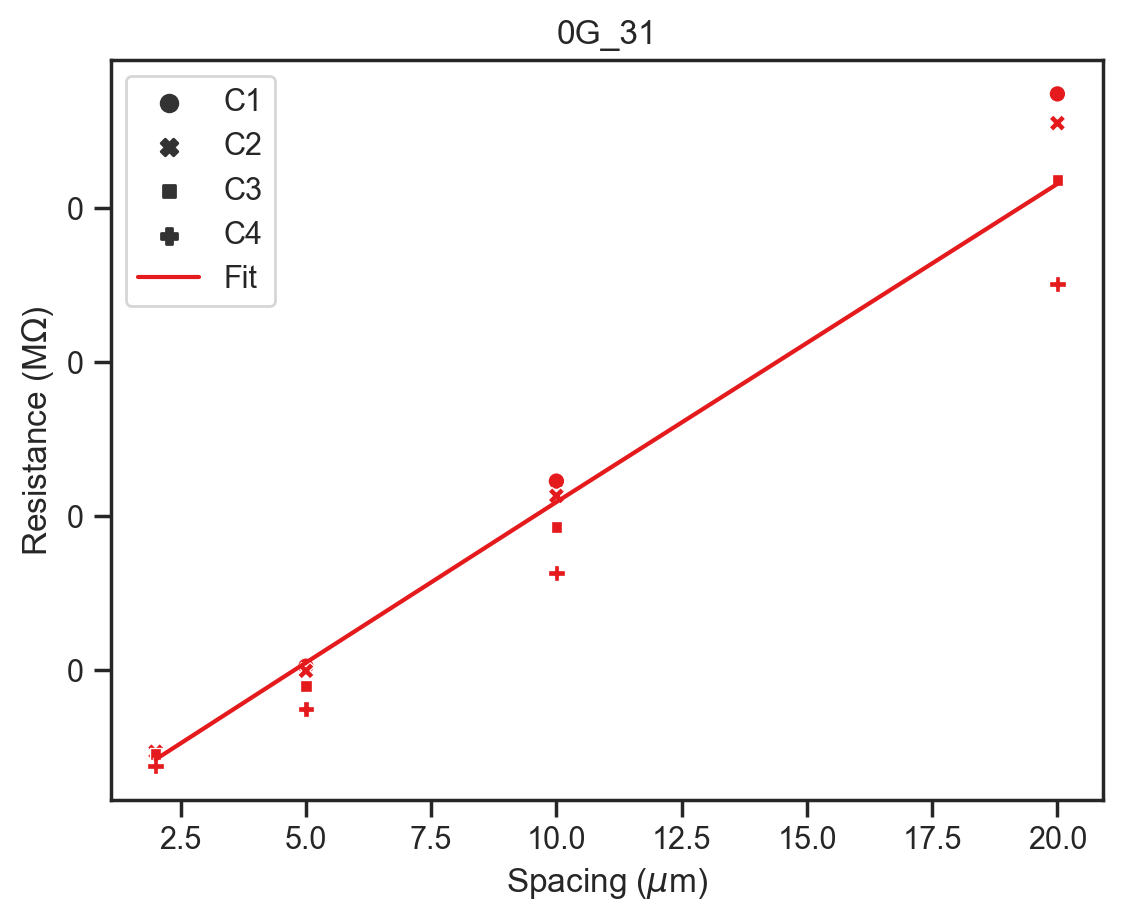

In [30]:
path_aut = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_31'
path_save = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\Results'
sample = path_aut[-5:]
files_aut = [os.path.join(path_aut, i) for i in os.listdir(path_aut)]

rt, tlm, val = idea.fit(files_aut, 180, sample)

fig, ax = plt.subplots(dpi = 200)
# sns.lineplot(data = tlm, x = 'Spacing ($\mu$m)', y = 'Resistance (M$\Omega$)', errorbar = 'sd', marker = 'o', linestyle = '', err_style='bars', label = 'Data') #, style = 'Column')
sns.scatterplot(data = tlm, x = 'Spacing ($\mu$m)', y = 'Resistance (M$\Omega$)', style = 'Column')
sns.lineplot(data = tlm, x = 'Spacing ($\mu$m)', y = 'Fit', label = 'Fit') #, hue = 'Column')
ax.xaxis.set_major_formatter(lambda x, pos: '{:.1f}'.format(x * 1e4))
ax.yaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x / 1e6))
plt.title(sample)

tlm.to_csv(os.path.join(path_save, sample + '.txt'), sep = ';', index = False)
val.to_csv(os.path.join(path_save, 'val_' + sample + '.txt'), sep = ';', index = False)

# display(tlm)
# display(rt)
display(val)

# fig, ax = plt.subplots(dpi = 200)
# sns.lineplot(data = rt, x = 'Potential (V)', y = 'Current (A)', hue = 'Structure', errorbar='sd', style = 'Column')
# ax.yaxis.set_major_formatter(lambda x, pos: '{:.2f}'.format(x * 1e6))
# ax.set_ylabel('Current ($\mu$A)')
# ax.set_title(sample)
# plt.legend(ncol = 2)

Lets put the samples together

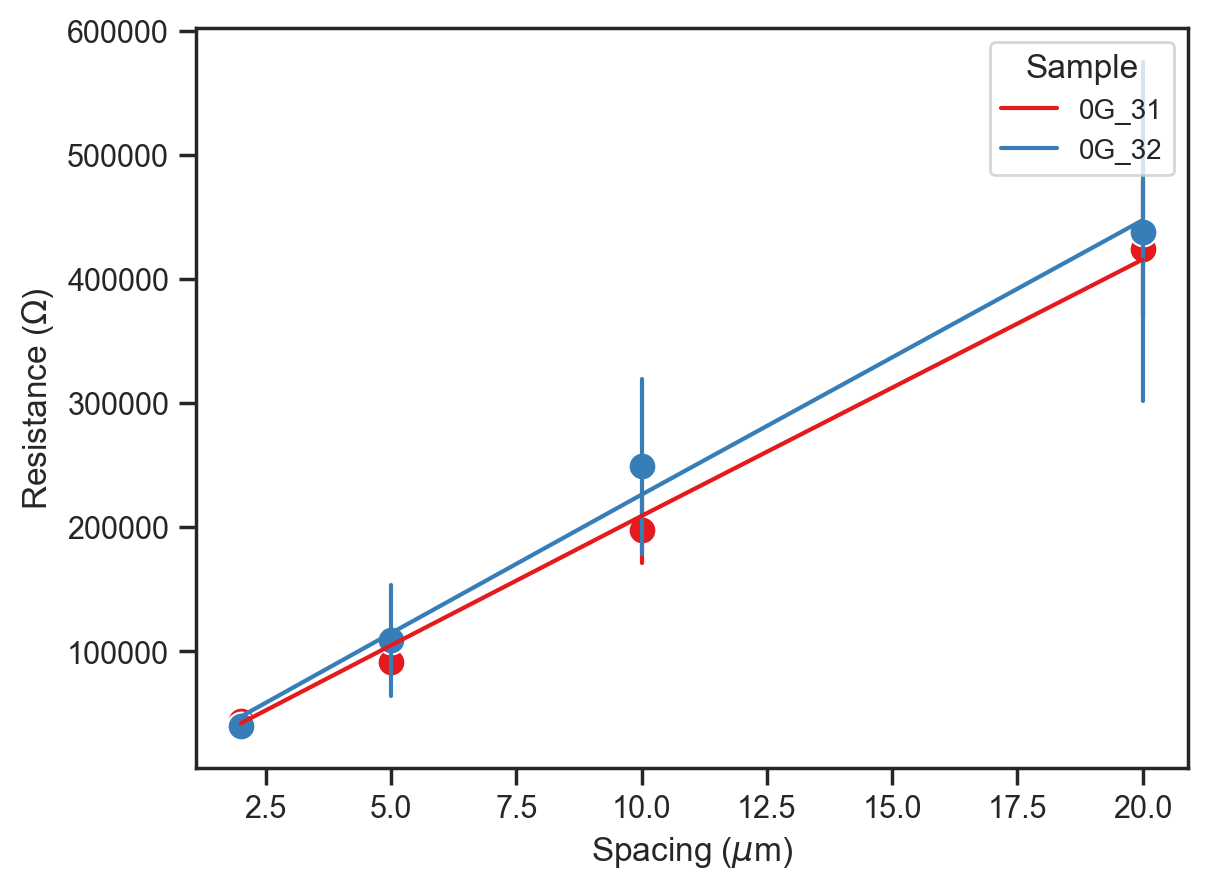

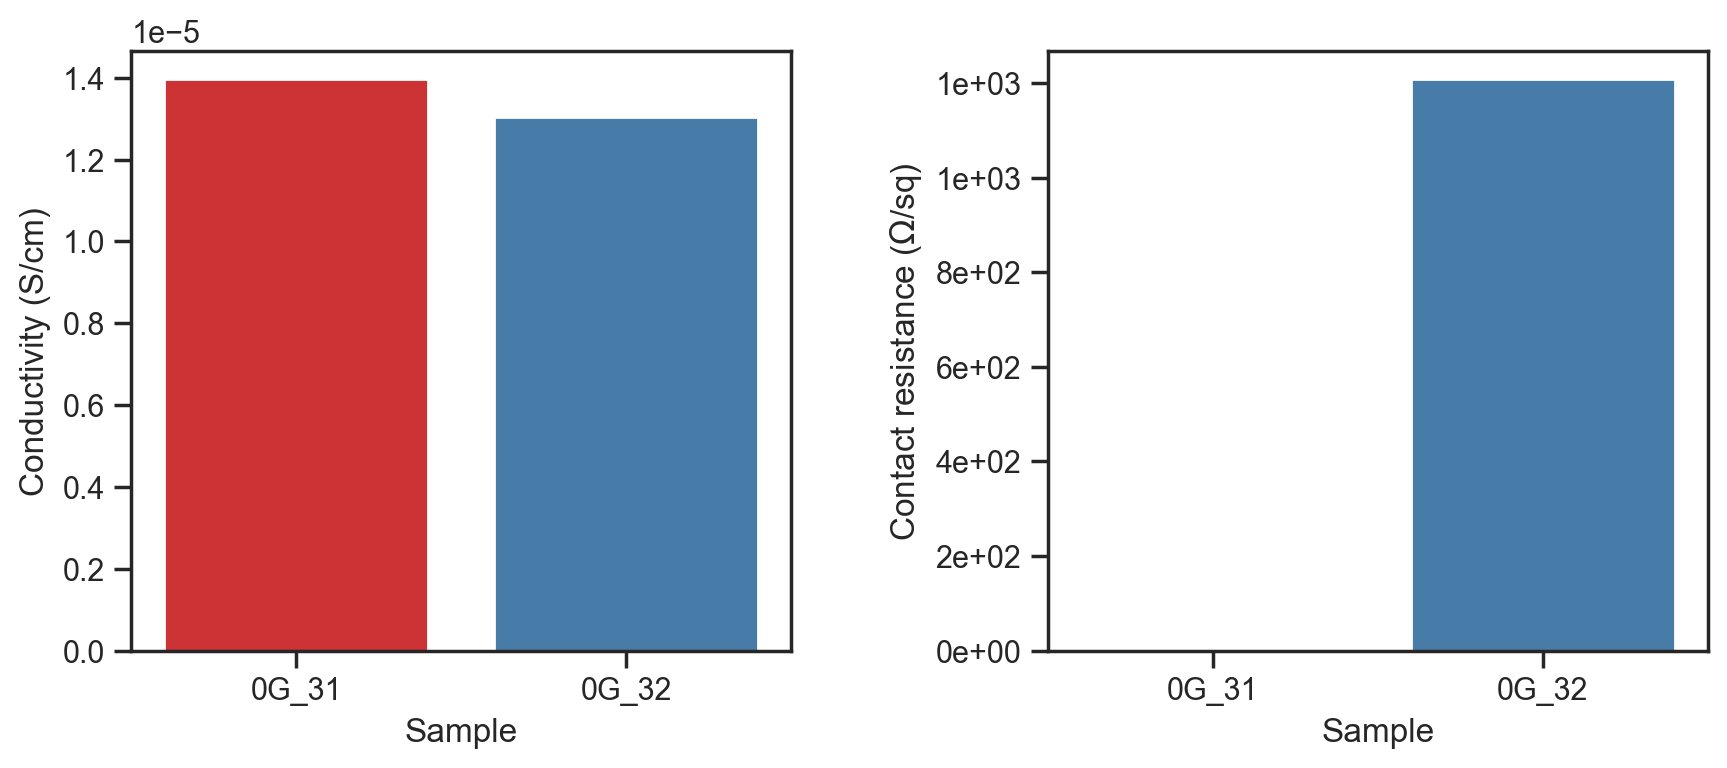

In [43]:
path_results = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\Results_to_show'
files_r = [os.path.join(path_results, i) for i in os.listdir(path_results)]
col = [	'Spacing ($\mu$m)',	'Resistance (M$\Omega$)',	'Column',	'Fit',	'Sample'] # fix the scale since the label of resistance is in M
col_v = ['Sheet resistance ($\Omega$/sq)', 'Contact resistance ($\Omega$/sq)', 'Conductivity (S/cm)', 'Column', 'Sample' ]
df_values = pd.DataFrame()
df_results = pd.DataFrame()
for i in files_r:
    if 'val' in i:
        df_v = pd.read_csv(i, sep = ';')
        df_values = pd.concat([df_values, df_v])  
    else:
        df = pd.read_csv(i, sep = ';')
        df_results = pd.concat([df_results, df])

df_results = df_results.sort_values(by = ['Sample'])
df_results.reset_index(inplace = True, drop=True)
df_values.reset_index(inplace = True, drop=True)

fig, ax = plt.subplots(dpi = 200)
sns.lineplot(data = df_results, x = col[0], y = col[1], hue = col[4], legend = None, marker = 'o', markersize = 10, linestyle = '', err_style='bars', errorbar='sd')
sns.lineplot(data = df_results, x = col[0], y = col[3], hue = 'Sample', errorbar = 'ci')   #, hue = col[4], style = col[4])
ax.xaxis.set_major_formatter(lambda x, pos: '{:.1f}'.format(x * 1e4)) # fixed
# ax.yaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x / 1e6))
ax.set_ylabel('Resistance ($\Omega$)')
h, l = plt.gca().get_legend_handles_labels()
# h_r, l_r = list(reversed(h)), list(reversed(l))
ax.legend(fontsize = 10, title = 'Sample')

fig, ax = plt.subplots(dpi = 200, ncols=2, figsize = [10,5])
fig.tight_layout(pad = 5)
df_values = df_values.sort_values(by=['Sample']) # sort by column
sns.barplot(data = df_values, x = 'Sample', y = col_v[2], ax = ax[0], errorbar='sd', yerr = 0) #, hue = 'Column')
sns.barplot(data = df_values, x = 'Sample', y = col_v[1], ax = ax[1], errorbar= 'sd') #, hue = 'Column')
# ax[0].legend(fontsize = 7)
# ax[1].legend(fontsize = 7)
ax[1].yaxis.set_major_formatter(lambda x, pos: '{:.0e}'.format(x))


# display(df_values)

